In [1]:
### calling packages

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import time
from datetime import datetime

In [2]:
# pd.set_option('display.max_rows', None)

### 0. 통일성을 위한 공통 작업

In [3]:
### matplotlib, seaborn 한글 깨짐 현상 해결

from matplotlib import font_manager, rc # matplotlib, seaborn에서 한글 깨짐 현상을 해결하기 위함

font_path = "C:/WINDOWS/FONTS/MALGUNSL.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
### 색상 통일

col=['#6B4E24','#EECA98','#EBAA4F','#6B5B45','#B8853E','#AB891A','#6B5610','#EBBC23','#F7B50F']

### 3. 기간별 일평균 데이터를 통해 요일 경향성을 살펴보자!

In [5]:
### '서울시 기간별 일평균 대기환경 정보.csv'를 ATM_daily_df라는 데이터프레임 형태로 불러오기

ATM_daily_df = pd.read_csv('C:/Users/izzle/Downloads/서울시 기간별 일평균 대기환경 정보.csv', encoding='cp949')
ATM_daily_df.head(10)

,측정일자,권역명,측정소명,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
0,20230113,도심권,중구,0,0,0.000,0.000,0.0,0.000
1,20230113,도심권,종로구,19,12,0.009,0.037,0.8,0.004
2,20230113,도심권,용산구,18,13,0.007,0.036,0.7,0.003
3,20230113,서북권,은평구,14,9,0.017,0.020,1.0,0.004
4,20230113,서북권,서대문구,15,10,0.016,0.024,0.8,0.003
5,20230113,서북권,마포구,18,14,0.010,0.036,0.7,0.004
6,20230113,동북권,광진구,17,11,0.009,0.027,0.5,0.003
7,20230113,동북권,성동구,27,12,0.005,0.041,0.7,0.004
8,20230113,동북권,중랑구,22,11,0.009,0.039,0.6,0.003
9,20230113,동북권,동대문구,26,13,0.006,0.041,0.8,0.004


In [6]:
### 광진구 자료만 추출하기

gwangjin_daily = ATM_daily_df[ATM_daily_df['측정소명'] == '광진구']
gwangjin_daily.head(10)

,측정일자,권역명,측정소명,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
6,20230113,동북권,광진구,17,11,0.009,0.027,0.5,0.003
31,20230112,동북권,광진구,65,46,0.006,0.044,0.6,0.004
56,20230111,동북권,광진구,71,45,0.005,0.050,0.9,0.004
81,20230110,동북권,광진구,61,31,0.007,0.042,0.7,0.002
106,20230109,동북권,광진구,100,39,0.008,0.021,0.9,0.002
131,20230108,동북권,광진구,125,59,0.012,0.020,1.1,0.002
156,20230107,동북권,광진구,115,83,0.019,0.019,1.2,0.002
181,20230106,동북권,광진구,74,57,0.009,0.030,1.0,0.003
206,20230105,동북권,광진구,46,33,0.005,0.030,1.0,0.002
231,20230104,동북권,광진구,34,22,0.010,0.023,0.7,0.002


In [7]:
### 데이터 타입

gwangjin_daily.dtypes

측정일자              int64
권역명              object
측정소명             object
미세먼지(㎍/㎥)         int64
초미세먼지(㎍/㎥)        int64
오존(ppm)         float64
이산화질소농도(ppm)    float64
일산화탄소농도(ppm)    float64
아황산가스농도(ppm)    float64
dtype: object

In [8]:
### 결측치 확인

gwangjin_daily.isnull().sum()

측정일자            0
권역명             0
측정소명            0
미세먼지(㎍/㎥)       0
초미세먼지(㎍/㎥)      0
오존(ppm)         0
이산화질소농도(ppm)    0
일산화탄소농도(ppm)    0
아황산가스농도(ppm)    0
dtype: int64

In [9]:
### datetime 적용하기

gwangjin_daily['측정일자'] = gwangjin_daily['측정일자'].astype(str)
gwangjin_daily['측정일자'] = pd.to_datetime(gwangjin_daily['측정일자'])

C:\Users\izzle\AppData\Local\Temp\ipykernel_9692\2156580655.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangjin_daily['측정일자'] = gwangjin_daily['측정일자'].astype(str)
C:\Users\izzle\AppData\Local\Temp\ipykernel_9692\2156580655.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangjin_daily['측정일자'] = pd.to_datetime(gwangjin_daily['측정일자'])


In [10]:
### 데이터 타입 재확인

gwangjin_daily.dtypes

측정일자            datetime64[ns]
권역명                     object
측정소명                    object
미세먼지(㎍/㎥)                int64
초미세먼지(㎍/㎥)               int64
오존(ppm)                float64
이산화질소농도(ppm)           float64
일산화탄소농도(ppm)           float64
아황산가스농도(ppm)           float64
dtype: object

##### 요일별 평균 및 정렬

In [11]:
### 요일 알아내기
# 0: 월요일, 1: 화요일, 2: 수요일, 3: 목요일, 4: 금요일, 5: 토요일, 6: 일요일

gwangjin_daily['요일'] = gwangjin_daily['측정일자'].dt.weekday
gwangjin_daily.head()

C:\Users\izzle\AppData\Local\Temp\ipykernel_9692\1418265821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gwangjin_daily['요일'] = gwangjin_daily['측정일자'].dt.weekday


,측정일자,권역명,측정소명,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm),요일
6,2023-01-13,동북권,광진구,17,11,0.009,0.027,0.5,0.003,4
31,2023-01-12,동북권,광진구,65,46,0.006,0.044,0.6,0.004,3
56,2023-01-11,동북권,광진구,71,45,0.005,0.050,0.9,0.004,2
81,2023-01-10,동북권,광진구,61,31,0.007,0.042,0.7,0.002,1
106,2023-01-09,동북권,광진구,100,39,0.008,0.021,0.9,0.002,0


In [12]:
### 요일별 평균 알아내기

day_group = gwangjin_daily.groupby('요일')
day_group.mean()

C:\Users\izzle\AppData\Local\Temp\ipykernel_9692\664376088.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_group.mean()


,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
요일,,,,,,
0,28.557692,16.096154,0.026327,0.017596,0.467308,0.002827
1,32.750000,17.423077,0.026923,0.018462,0.467308,0.002942
2,33.307692,17.961538,0.026404,0.019519,0.475000,0.002865
3,31.557692,17.865385,0.026385,0.020154,0.486538,0.002846
4,32.320755,19.584906,0.027604,0.019962,0.486792,0.002887
5,34.634615,20.711538,0.029712,0.017462,0.490385,0.002788
6,31.269231,18.653846,0.030769,0.013865,0.484615,0.002788


In [13]:
### 이산화질소 농도에 대해 내림차순

day_group.mean().sort_values(by='이산화질소농도(ppm)', ascending=False, inplace=False)

# 이산화질소 농도는 평균적으로 목요일이 가장 높고, 일요일이 가장 낮다

C:\Users\izzle\AppData\Local\Temp\ipykernel_9692\3796659411.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_group.mean().sort_values(by='이산화질소농도(ppm)', ascending=False, inplace=False)


,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
요일,,,,,,
3,31.557692,17.865385,0.026385,0.020154,0.486538,0.002846
4,32.320755,19.584906,0.027604,0.019962,0.486792,0.002887
2,33.307692,17.961538,0.026404,0.019519,0.475000,0.002865
1,32.750000,17.423077,0.026923,0.018462,0.467308,0.002942
0,28.557692,16.096154,0.026327,0.017596,0.467308,0.002827
5,34.634615,20.711538,0.029712,0.017462,0.490385,0.002788
6,31.269231,18.653846,0.030769,0.013865,0.484615,0.002788


In [14]:
### 오존 농도에 대해 내림차순

day_group.mean().sort_values(by='오존(ppm)', ascending=False, inplace=False)

# 오존 농도는 평균적으로 일요일이 가장 높고, 월요일이 가장 낮다

C:\Users\izzle\AppData\Local\Temp\ipykernel_9692\4277865156.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_group.mean().sort_values(by='오존(ppm)', ascending=False, inplace=False)


,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
요일,,,,,,
6,31.269231,18.653846,0.030769,0.013865,0.484615,0.002788
5,34.634615,20.711538,0.029712,0.017462,0.490385,0.002788
4,32.320755,19.584906,0.027604,0.019962,0.486792,0.002887
1,32.750000,17.423077,0.026923,0.018462,0.467308,0.002942
2,33.307692,17.961538,0.026404,0.019519,0.475000,0.002865
3,31.557692,17.865385,0.026385,0.020154,0.486538,0.002846
0,28.557692,16.096154,0.026327,0.017596,0.467308,0.002827


In [15]:
### 미세먼지 농도에 대해 내림차순

day_group.mean().sort_values(by='미세먼지(㎍/㎥)', ascending=False, inplace=False)

# 미세먼지 농도는 평균적으로 토요일이 가장 높고, 월요일이 가장 낮다

C:\Users\izzle\AppData\Local\Temp\ipykernel_9692\4248288363.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_group.mean().sort_values(by='미세먼지(㎍/㎥)', ascending=False, inplace=False)


,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
요일,,,,,,
5,34.634615,20.711538,0.029712,0.017462,0.490385,0.002788
2,33.307692,17.961538,0.026404,0.019519,0.475000,0.002865
1,32.750000,17.423077,0.026923,0.018462,0.467308,0.002942
4,32.320755,19.584906,0.027604,0.019962,0.486792,0.002887
3,31.557692,17.865385,0.026385,0.020154,0.486538,0.002846
6,31.269231,18.653846,0.030769,0.013865,0.484615,0.002788
0,28.557692,16.096154,0.026327,0.017596,0.467308,0.002827


In [16]:
### 초미세먼지 농도에 대해 내림차순

day_group.mean().sort_values(by='초미세먼지(㎍/㎥)', ascending=False, inplace=False)

# 초미세먼지 농도는 평균적으로 금요일이 가장 높고, 월요일이 가장 낮다

C:\Users\izzle\AppData\Local\Temp\ipykernel_9692\3796434036.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  day_group.mean().sort_values(by='초미세먼지(㎍/㎥)', ascending=False, inplace=False)


,미세먼지(㎍/㎥),초미세먼지(㎍/㎥),오존(ppm),이산화질소농도(ppm),일산화탄소농도(ppm),아황산가스농도(ppm)
요일,,,,,,
5,34.634615,20.711538,0.029712,0.017462,0.490385,0.002788
4,32.320755,19.584906,0.027604,0.019962,0.486792,0.002887
6,31.269231,18.653846,0.030769,0.013865,0.484615,0.002788
2,33.307692,17.961538,0.026404,0.019519,0.475000,0.002865
3,31.557692,17.865385,0.026385,0.020154,0.486538,0.002846
1,32.750000,17.423077,0.026923,0.018462,0.467308,0.002942
0,28.557692,16.096154,0.026327,0.017596,0.467308,0.002827


##### 요일별 barplot

Text(0.5, 1.0, '광진구 요일별 이산화질소 농도 barplot')

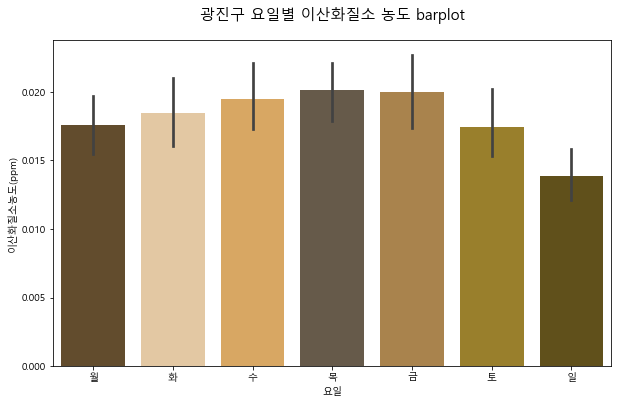

In [17]:
### 이산화질소 농도 요일별 barplot

plt.figure(figsize = (10, 6))
sns.barplot(data = gwangjin_daily, x = '요일', y = '이산화질소농도(ppm)', palette = col, order = [0, 1, 2, 3, 4, 5, 6])
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['월', '화', '수', '목', '금', '토', '일'])
plt.title('광진구 요일별 이산화질소 농도 barplot', fontsize = 15, pad = 20)

# plt.savefig('광진구 이산화질소 농도 요일별 barplot.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

Text(0.5, 1.0, '광진구 요일별 오존 농도 barplot')

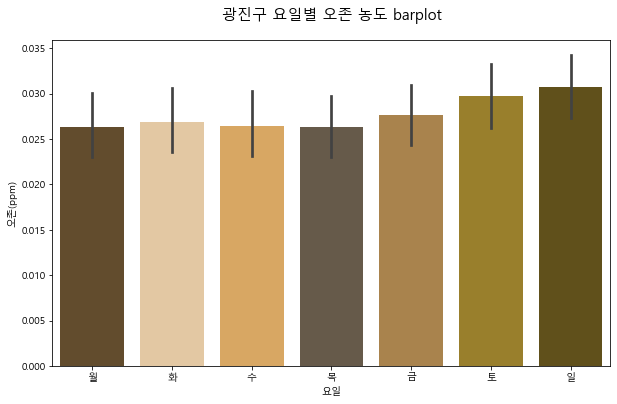

In [18]:
### 오존 농도 요일별 barplot

plt.figure(figsize = (10, 6))
sns.barplot(data = gwangjin_daily, x = '요일', y = '오존(ppm)', palette = col, order = [0, 1, 2, 3, 4, 5, 6])
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['월', '화', '수', '목', '금', '토', '일'])
plt.title('광진구 요일별 오존 농도 barplot', fontsize = 15, pad = 20)

# plt.savefig('광진구 오존 농도 요일별 barplot.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

Text(0.5, 1.0, '광진구 요일별 미세먼지 농도 barplot')

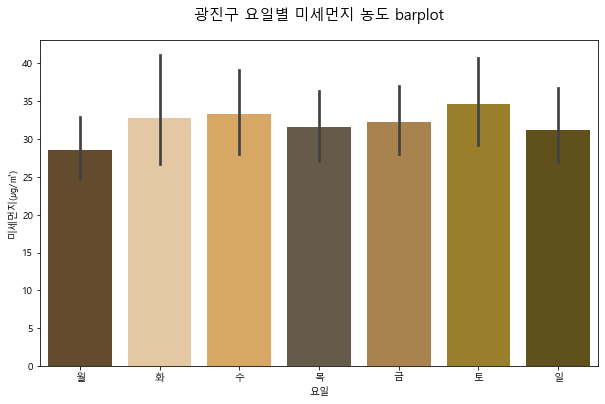

In [19]:
### 미세먼지 농도 요일별 barplot

plt.figure(figsize = (10, 6))
sns.barplot(data = gwangjin_daily, x = '요일', y = '미세먼지(㎍/㎥)', palette = col, order = [0, 1, 2, 3, 4, 5, 6])
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['월', '화', '수', '목', '금', '토', '일'])
plt.title('광진구 요일별 미세먼지 농도 barplot', fontsize = 15, pad = 20)

# plt.savefig('광진구 미세먼지 농도 요일별 barplot.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

Text(0.5, 1.0, '광진구 요일별 초미세먼지 농도 barplot')

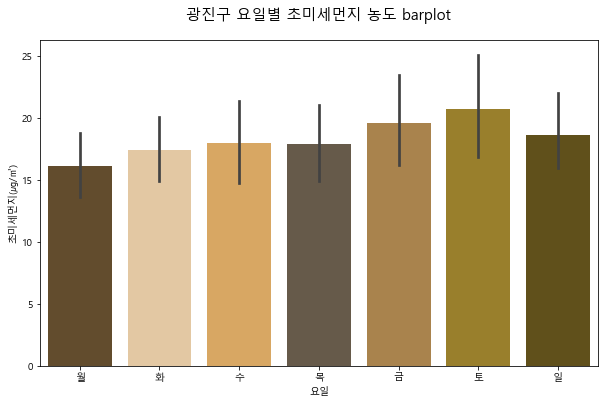

In [20]:
### 초미세먼지 농도 요일별 barplot

plt.figure(figsize = (10, 6))
sns.barplot(data = gwangjin_daily, x = '요일', y = '초미세먼지(㎍/㎥)', palette = col, order = [0, 1, 2, 3, 4, 5, 6])
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['월', '화', '수', '목', '금', '토', '일'])
plt.title('광진구 요일별 초미세먼지 농도 barplot', fontsize = 15, pad = 20)

# plt.savefig('광진구 초미세먼지 농도 요일별 barplot.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

##### 요일별 box plot

Text(0, 0.5, '농도(ppm)')

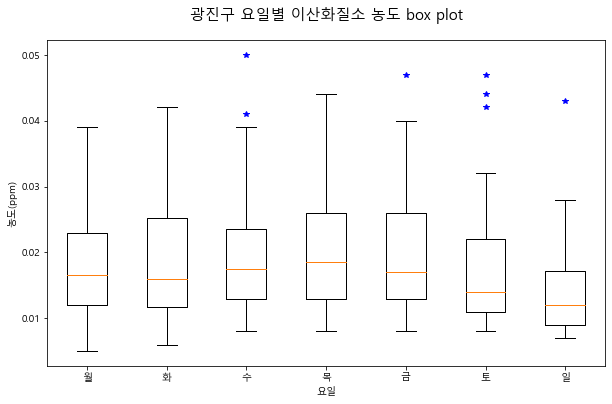

In [21]:
### 이산화질소 농도 요일별 box plot

plt.figure(figsize = (10, 6))
plt.boxplot([gwangjin_daily[gwangjin_daily['요일'] == 0]['이산화질소농도(ppm)'],
            gwangjin_daily[gwangjin_daily['요일'] == 1]['이산화질소농도(ppm)'],
            gwangjin_daily[gwangjin_daily['요일'] == 2]['이산화질소농도(ppm)'],
            gwangjin_daily[gwangjin_daily['요일'] == 3]['이산화질소농도(ppm)'],
            gwangjin_daily[gwangjin_daily['요일'] == 4]['이산화질소농도(ppm)'],
            gwangjin_daily[gwangjin_daily['요일'] == 5]['이산화질소농도(ppm)'],
            gwangjin_daily[gwangjin_daily['요일'] == 6]['이산화질소농도(ppm)']], sym = 'b*')

plt.xticks([1, 2, 3, 4, 5, 6, 7], ['월', '화', '수', '목', '금', '토', '일'])
plt.title('광진구 요일별 이산화질소 농도 box plot', fontsize = 15, pad = 20)
plt.xlabel('요일')
plt.ylabel('농도(ppm)')

# plt.savefig('광진구 이산화질소 농도 요일별 box plot.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

Text(0, 0.5, '농도(ppm)')

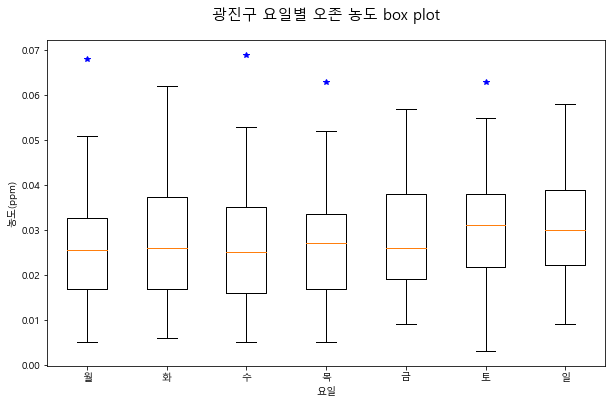

In [22]:
### 오존 농도 요일별 box plot

plt.figure(figsize = (10, 6))
plt.boxplot([gwangjin_daily[gwangjin_daily['요일'] == 0]['오존(ppm)'],
            gwangjin_daily[gwangjin_daily['요일'] == 1]['오존(ppm)'],
            gwangjin_daily[gwangjin_daily['요일'] == 2]['오존(ppm)'],
            gwangjin_daily[gwangjin_daily['요일'] == 3]['오존(ppm)'],
            gwangjin_daily[gwangjin_daily['요일'] == 4]['오존(ppm)'],
            gwangjin_daily[gwangjin_daily['요일'] == 5]['오존(ppm)'],
            gwangjin_daily[gwangjin_daily['요일'] == 6]['오존(ppm)']], sym = 'b*')

plt.xticks([1, 2, 3, 4, 5, 6, 7], ['월', '화', '수', '목', '금', '토', '일'])
plt.title('광진구 요일별 오존 농도 box plot', fontsize = 15, pad = 20)
plt.xlabel('요일')
plt.ylabel('농도(ppm)')

# plt.savefig('광진구 오존 농도 요일별 box plot.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

Text(0, 0.5, '농도(㎍/㎥)')

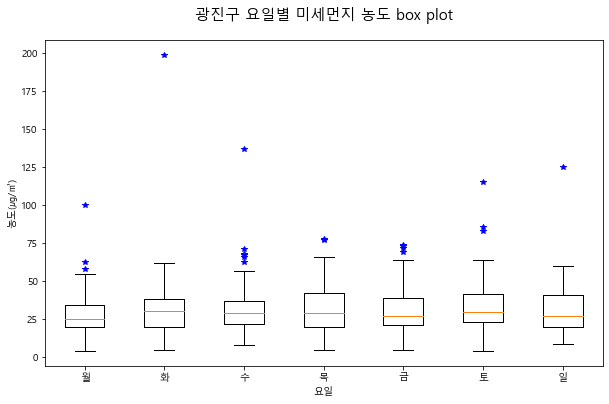

In [23]:
### 미세먼지 농도 요일별 box plot

plt.figure(figsize = (10, 6))
plt.boxplot([gwangjin_daily[gwangjin_daily['요일'] == 0]['미세먼지(㎍/㎥)'],
            gwangjin_daily[gwangjin_daily['요일'] == 1]['미세먼지(㎍/㎥)'],
            gwangjin_daily[gwangjin_daily['요일'] == 2]['미세먼지(㎍/㎥)'],
            gwangjin_daily[gwangjin_daily['요일'] == 3]['미세먼지(㎍/㎥)'],
            gwangjin_daily[gwangjin_daily['요일'] == 4]['미세먼지(㎍/㎥)'],
            gwangjin_daily[gwangjin_daily['요일'] == 5]['미세먼지(㎍/㎥)'],
            gwangjin_daily[gwangjin_daily['요일'] == 6]['미세먼지(㎍/㎥)']], sym = 'b*')

plt.xticks([1, 2, 3, 4, 5, 6, 7], ['월', '화', '수', '목', '금', '토', '일'])
plt.title('광진구 요일별 미세먼지 농도 box plot', fontsize = 15, pad = 20)
plt.xlabel('요일')
plt.ylabel('농도(㎍/㎥)')

# plt.savefig('광진구 미세먼지 농도 요일별 box plot.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)

Text(0, 0.5, '농도(㎍/㎥)')

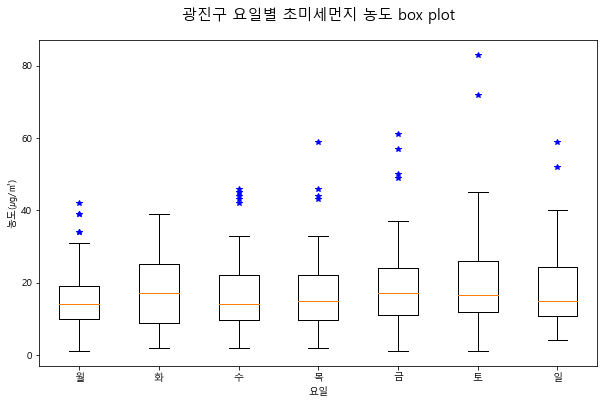

In [24]:
### 초미세먼지 농도 요일별 box plot

plt.figure(figsize = (10, 6))
plt.boxplot([gwangjin_daily[gwangjin_daily['요일'] == 0]['초미세먼지(㎍/㎥)'],
            gwangjin_daily[gwangjin_daily['요일'] == 1]['초미세먼지(㎍/㎥)'],
            gwangjin_daily[gwangjin_daily['요일'] == 2]['초미세먼지(㎍/㎥)'],
            gwangjin_daily[gwangjin_daily['요일'] == 3]['초미세먼지(㎍/㎥)'],
            gwangjin_daily[gwangjin_daily['요일'] == 4]['초미세먼지(㎍/㎥)'],
            gwangjin_daily[gwangjin_daily['요일'] == 5]['초미세먼지(㎍/㎥)'],
            gwangjin_daily[gwangjin_daily['요일'] == 6]['초미세먼지(㎍/㎥)']], sym = 'b*')

plt.xticks([1, 2, 3, 4, 5, 6, 7], ['월', '화', '수', '목', '금', '토', '일'])
plt.title('광진구 요일별 초미세먼지 농도 box plot', fontsize = 15, pad = 20)
plt.xlabel('요일')
plt.ylabel('농도(㎍/㎥)')

# plt.savefig('광진구 초미세먼지 농도 요일별 box plot.png', facecolor = 'white', bbox_inches='tight', pad_inches=0.5)